**Импортируем необходимые библиотеки:**

In [154]:
import pandas as pd
import numpy as np

**Просмотрим информацию о датасете "experiments", включая описательную статистику:**

In [155]:
experiments = pd.read_csv('experiments.csv')
experiments.head()

,Participant ID,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [156]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Current Weight (lbs)           100 non-null    float64
 2   BMR (Calories)                 100 non-null    float64
 3   Daily Calories Consumed        100 non-null    float64
 4   Daily Caloric Surplus/Deficit  100 non-null    float64
 5   Weight Change (lbs)            100 non-null    float64
 6   Duration (weeks)               100 non-null    int64  
 7   Physical Activity Level        100 non-null    object 
 8   Sleep Quality                  100 non-null    object 
 9   Stress Level                   100 non-null    int64  
 10  Final Weight (lbs)             100 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 8.7+ KB


*   В датасете отсутсвуют пропущенные значения

In [157]:
experiments.describe(include='all')

,Participant ID,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100,100.000000,100.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lightly Active,Poor,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,38,NaN,NaN
mean,50.500000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,NaN,NaN,4.810000,168.750000
std,29.011492,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,NaN,NaN,2.576879,30.588004
min,1.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,NaN,NaN,1.000000,98.200000
25%,25.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,NaN,NaN,2.750000,149.550000
50%,50.500000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,NaN,NaN,5.000000,169.800000
75%,75.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,NaN,NaN,7.000000,188.300000


**Проверим, есть ли дубликаты в выборке:**

In [158]:
sum_duplicated = experiments.duplicated().sum()
print('Количество дубликатов: ', sum_duplicated)

Количество дубликатов:  0




---
---



**Просмотрим информацию о датасете "participants", включая описательную статистику:**

In [159]:
participants = pd.read_csv('participants.csv', sep=';')
participants.head()

,Participant ID,Age,Gender
0,1,56,M
1,2,46,F
2,3,32,F
3,4,25,F
4,5,38,M


In [160]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant ID  100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Gender          100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


*   В датасете отсутсвуют пропущенные значения

In [161]:
participants.describe(include='all')

,Participant ID,Age,Gender
count,100.000000,100.000000,100
unique,NaN,NaN,2
top,NaN,NaN,M
freq,NaN,NaN,57
mean,50.500000,37.910000,NaN
std,29.011492,12.219454,NaN
min,1.000000,18.000000,NaN
25%,25.750000,26.750000,NaN
50%,50.500000,38.000000,NaN
75%,75.250000,46.250000,NaN


**Проверим, есть ли дубликаты в выборке:**

In [162]:
sum_duplicated2 = participants.duplicated().sum()
print('Количество дубликатов: ', sum_duplicated2)

Количество дубликатов:  0




---

---





**Объединяем датасеты:**

In [163]:
new = participants.merge(experiments, how = 'outer', on = 'Participant ID')
new.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


**Информация о датасете:**

In [164]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

*   В датасете отсутсвуют пропущенные значения


In [165]:
new.describe(include='all')

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100,100.000000,100.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,Lightly Active,Poor,NaN,NaN
freq,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,31,38,NaN,NaN
mean,50.500000,37.910000,NaN,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,NaN,NaN,4.810000,168.750000
std,29.011492,12.219454,NaN,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,NaN,NaN,2.576879,30.588004
min,1.000000,18.000000,NaN,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,NaN,NaN,1.000000,98.200000
25%,25.750000,26.750000,NaN,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,NaN,NaN,2.750000,149.550000
50%,50.500000,38.000000,NaN,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,NaN,NaN,5.000000,169.800000
75%,75.250000,46.250000,NaN,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,NaN,NaN,7.000000,188.300000


**Импортируем необходимые библиотеки и построим графики распределений:**

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

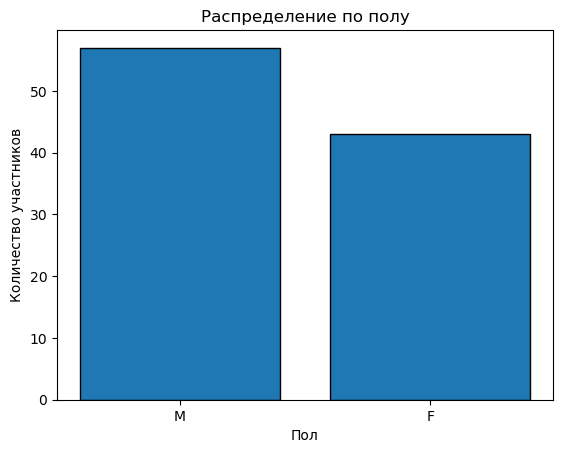

In [167]:
counts = new['Gender'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values, edgecolor='black')
ax.set_title('Распределение по полу')
ax.set_xlabel('Пол')
ax.set_ylabel('Количество участников')
plt.show()



*   В выборке наблюдается дисбаланс полов, который может привести к неточным результатам в последующих исследованиях (к примеру, к смещенным оценкам в модели прогнозирования итогового веса: преобладание мужчин в выборке может привести к завышенному прогнозу итогового веса для мужчин и заниженному — для женщин)

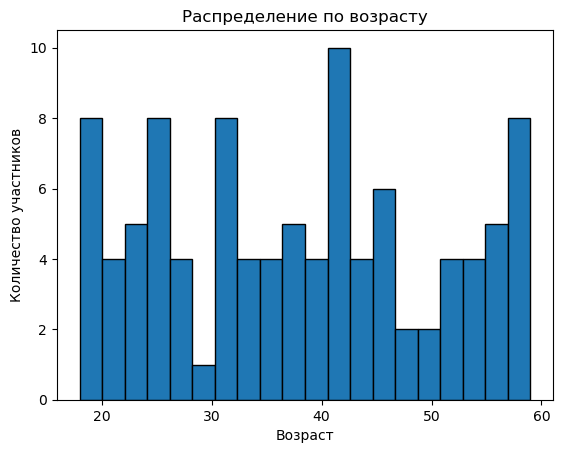

In [168]:
fig, ax = plt.subplots()
ax.hist(new['Age'], bins=20, edgecolor='black')
ax.set_title('Распределение по возрасту')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество участников')
plt.show()

*   Вывод:
Возраст участников распределен неравномерно, с пиком в районе 41-43. Неравномерное распределение по возрасту может исказить результаты анализа, особенно если возраст является фактором, влияющим на изучаемые переменные. Результаты анализа могут быть смещены в сторону характеристик возрастной группы 41-43 лет

**Проведем корреляционный анализ:**

*  Преобразуем категориальные переменные:

In [169]:
new_encoded = pd.get_dummies(new, columns=['Gender', 'Physical Activity Level', 'Sleep Quality', 'Stress Level'], drop_first=True)
new_encoded = new_encoded.drop('Participant ID', axis=1)

matrix = new_encoded.corr().round(2)
matrix

,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Final Weight (lbs),Gender_M,Physical Activity Level_Moderately Active,Physical Activity Level_Sedentary,Physical Activity Level_Very Active,Sleep Quality_Fair,Sleep Quality_Good,Sleep Quality_Poor,Stress Level_2,Stress Level_3,Stress Level_4,Stress Level_5,Stress Level_6,Stress Level_7,Stress Level_8,Stress Level_9
Age,1.00,-0.02,-0.20,-0.09,0.06,0.06,-0.09,-0.01,-0.03,0.07,-0.03,0.00,0.07,-0.06,-0.15,0.10,-0.25,0.13,-0.03,0.03,-0.02,0.04,0.01
Current Weight (lbs),-0.02,1.00,0.93,0.61,-0.07,-0.09,-0.02,0.97,0.28,0.10,0.01,-0.04,0.06,-0.04,-0.03,-0.05,0.17,0.04,-0.13,-0.05,-0.03,0.10,-0.08
BMR (Calories),-0.20,0.93,1.00,0.69,-0.03,-0.11,-0.00,0.90,0.57,0.11,-0.04,-0.05,0.03,0.02,-0.02,0.00,0.19,0.01,-0.05,-0.10,-0.13,0.14,-0.07
Daily Calories Consumed,-0.09,0.61,0.69,1.00,0.70,-0.06,0.06,0.59,0.49,0.24,-0.47,0.40,0.04,-0.04,0.01,-0.07,-0.04,0.01,0.04,0.01,-0.16,0.17,-0.04
Daily Caloric Surplus/Deficit,0.06,-0.07,-0.03,0.70,1.00,0.02,0.09,-0.06,0.12,0.23,-0.62,0.60,0.03,-0.07,0.03,-0.10,-0.24,0.00,0.11,0.11,-0.10,0.10,0.02
Weight Change (lbs),0.06,-0.09,-0.11,-0.06,0.02,1.00,-0.14,0.16,-0.07,-0.15,0.09,0.03,0.24,0.27,-0.62,0.23,0.08,0.14,0.09,0.12,0.06,-0.52,-0.34
Duration (weeks),-0.09,-0.02,-0.00,0.06,0.09,-0.14,1.00,-0.05,-0.00,-0.02,-0.11,0.06,0.08,0.15,-0.05,0.02,-0.05,-0.03,-0.11,-0.08,0.19,0.04,-0.03
Final Weight (lbs),-0.01,0.97,0.90,0.59,-0.06,0.16,-0.05,1.00,0.26,0.06,0.03,-0.03,0.11,0.02,-0.18,0.01,0.19,0.07,-0.11,-0.02,-0.01,-0.03,-0.16
Gender_M,-0.03,0.28,0.57,0.49,0.12,-0.07,-0.00,0.26,1.00,0.13,-0.15,-0.05,-0.03,0.12,-0.07,0.18,0.00,0.00,0.18,-0.14,-0.32,0.18,-0.01
Physical Activity Level_Moderately Active,0.07,0.10,0.11,0.24,0.23,-0.15,-0.02,0.06,0.13,1.00,-0.30,-0.32,0.11,-0.03,0.02,-0.17,-0.17,0.20,0.09,-0.09,-0.12,0.17,0.14


* Построим матрицу корреляции:

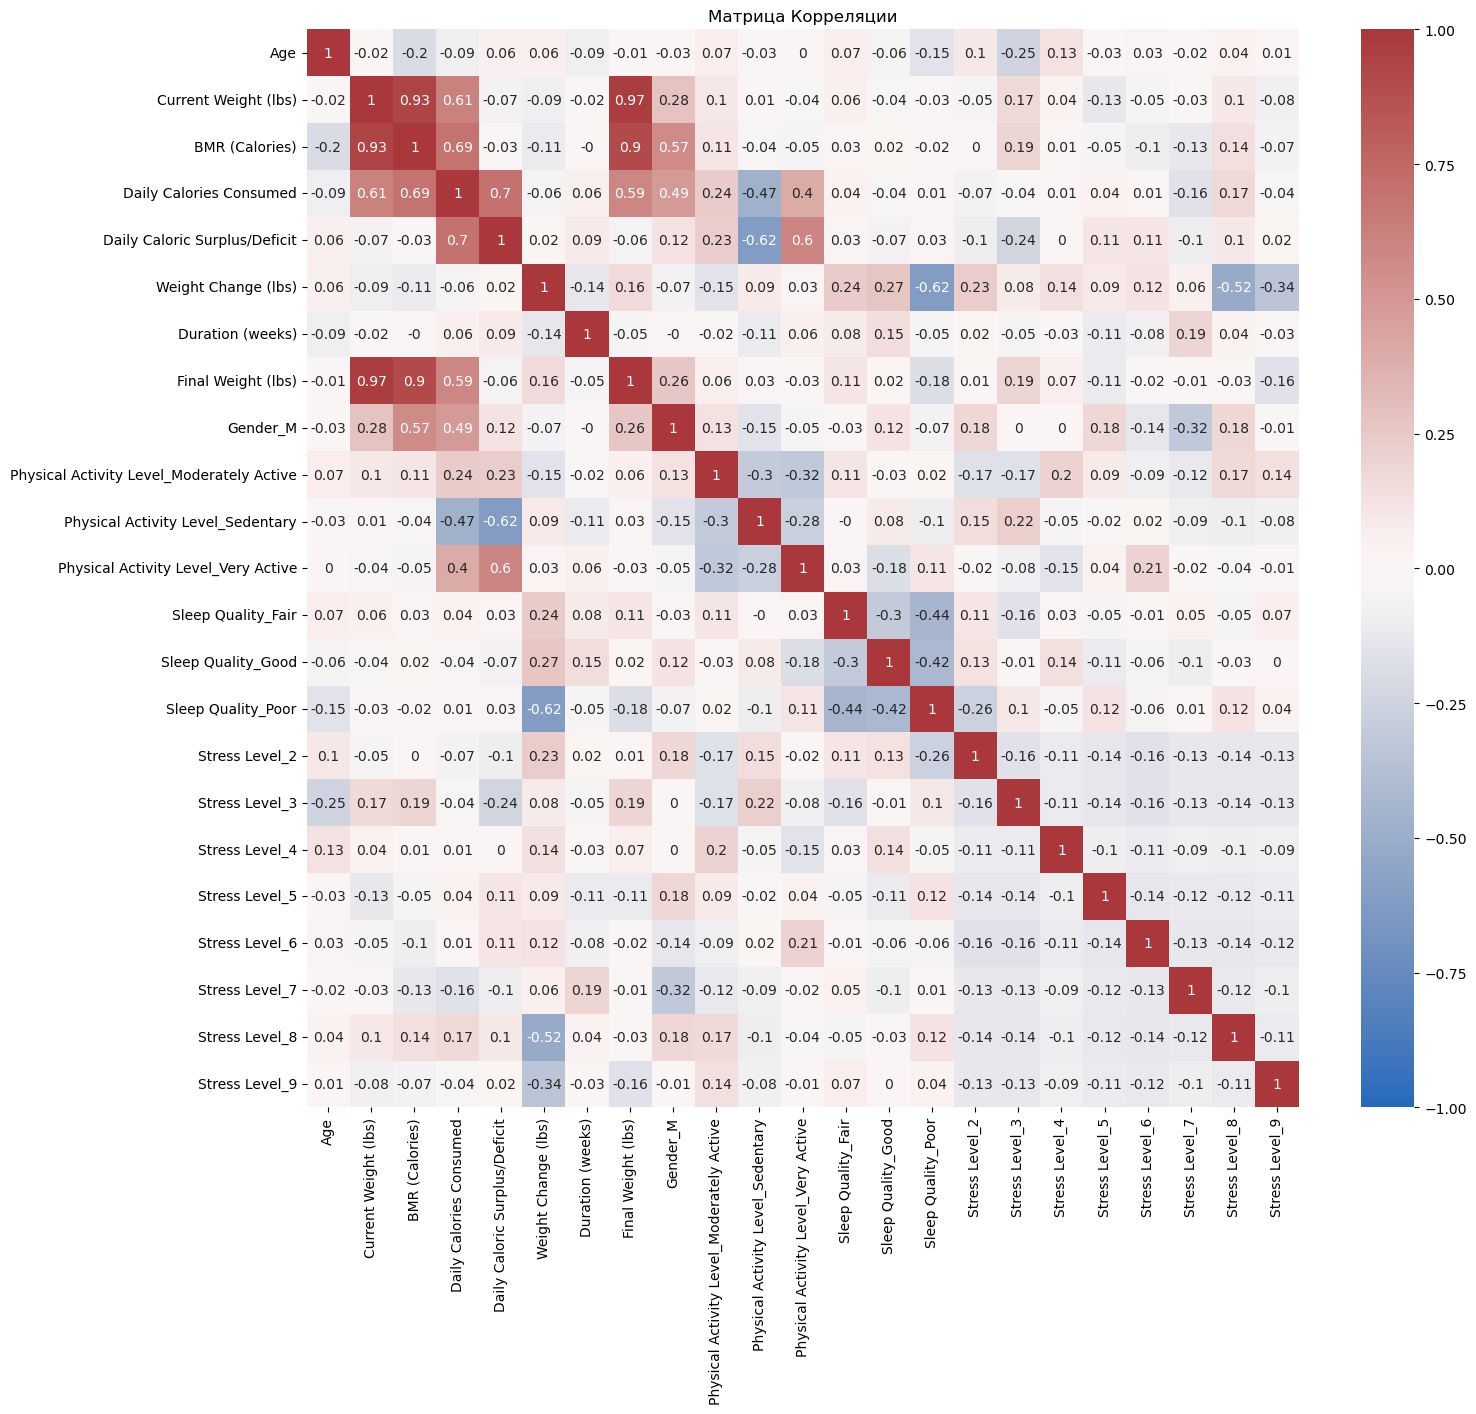

In [170]:
plt.figure(figsize=(16, 14))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Матрица Корреляции')
plt.show()

**Коэффициент корреляции между итоговым весом и остальными параметрами:**

In [171]:
matrix['Final Weight (lbs)'].to_frame()

,Final Weight (lbs)
Age,-0.01
Current Weight (lbs),0.97
BMR (Calories),0.90
Daily Calories Consumed,0.59
Daily Caloric Surplus/Deficit,-0.06
Weight Change (lbs),0.16
Duration (weeks),-0.05
Final Weight (lbs),1.00
Gender_M,0.26
Physical Activity Level_Moderately Active,0.06


**Общий вывод:**
* Итоговый вес в первую очередь связан с `начальным весом` и `BMR`, что логично физиологически
*  Также есть умеренная связь с `калорийностью `питания
*  `Поведенческие признаки` (сон, активность, стресс) и даже длительность участия `не показывают прямой линейной связи с итоговым весом` — их влияние может проявляться через изменение веса, а не через абсолютные значения

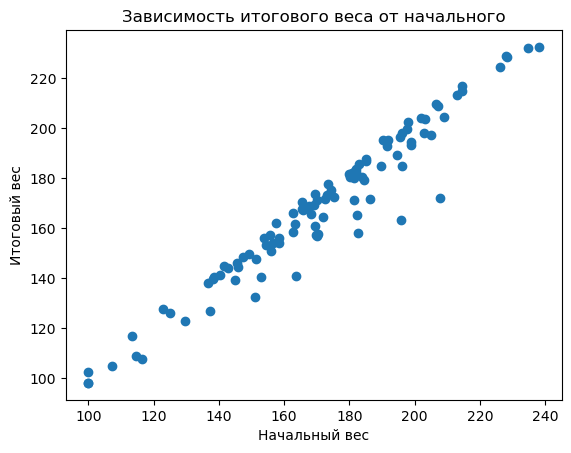

In [172]:
plt.scatter(new_encoded['Current Weight (lbs)'], new_encoded['Final Weight (lbs)'])
plt.xlabel('Начальный вес')
plt.ylabel('Итоговый вес')
plt.title('Зависимость итогового веса от начального')
plt.show()


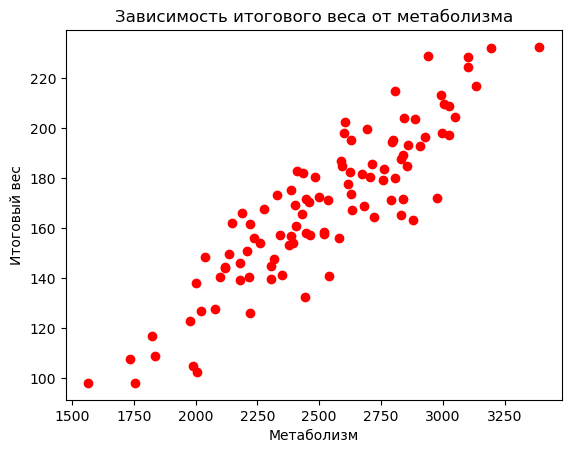

In [173]:
plt.scatter(new_encoded['BMR (Calories)'], new_encoded['Final Weight (lbs)'], c = 'Red')
plt.xlabel('Метаболизм')
plt.ylabel('Итоговый вес')
plt.title('Зависимость итогового веса от метаболизма')
plt.show()

**Импортируем необходимые библиотеки и обучаем модель для прогноза итогового веса с учетом текущего веса и ежедневно потребляемых калорий:**


*   Исключаем из предикторов метаболизм (для уменьшения влияния мультиколлинеарности на модель)



In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = new_encoded[['Current Weight (lbs)', 'Daily Calories Consumed']]
y = new_encoded['Final Weight (lbs)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [175]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)

*  Рассмотрим значимость коэффициентов в нашей модели:

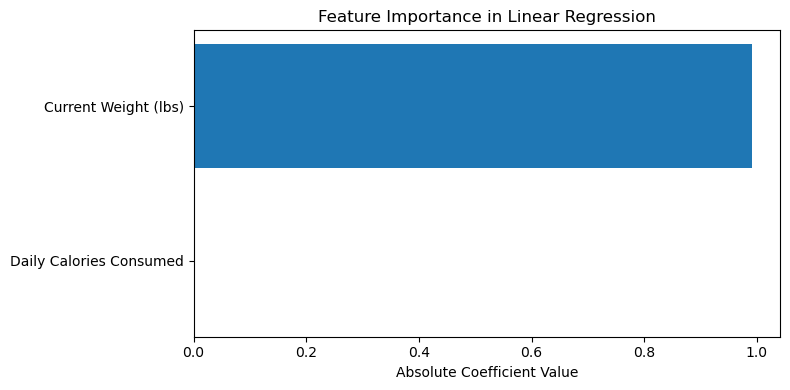

In [176]:
feature_names = X.columns
coefficients = model.coef_

# Создаем DataFrame с важностью признаков
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Importance': abs(coefficients)
}).sort_values(by='Absolute Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Если мы спользуем всесто Daily Calories Consumed, BMR (Calories) абсолютные значения коэффициентов остаются такими же

**Оценка алгоритма:**

In [177]:
from sklearn import metrics

# Метрики линейной регрессии
lin_metrics = {
    'Model': 'Linear Regression',
    'MAPE': metrics.mean_absolute_percentage_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': metrics.r2_score(y_test, predictions)
}

print(pd.DataFrame([lin_metrics]))

               Model      MAPE       RMSE       R2
0  Linear Regression  0.043843  10.815313  0.79735


*   Однако, в модели можно отметить присутствие мультиколлинеарности между предикторами:

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(X):
    '''Функция принимает предикторы''' 
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


vif = calc_vif(X)

print("VIF:")
print(vif)

VIF:
                 variables        VIF
0     Current Weight (lbs)  49.595665
1  Daily Calories Consumed  49.595665


Есть два варианта:
*   Следует примененить один из методов регуляризации, далее переобучить модель и оценить ее производительность на тестовых данных
*   Заменить моделль множественной линейной регрессии на нелинейные модели

**Попробуем применить Ridge регуляризацию:**

*  Применим optuna, чтобы подобрать наилучшие гиперпараметры:

In [179]:
import optuna
from sklearn.linear_model import Ridge

#Функция для оптимизации Ridge по RMSE
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 100.0, log=True)

    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    return rmse

#Запускаем Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_alpha = study.best_params['alpha']
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

#Метрики
metrics_ridge = {
    'Model': 'Ridge Regression',
    'Alpha': best_alpha,
    'MAPE': metrics.mean_absolute_percentage_error(y_test, ridge_preds),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, ridge_preds)),
    'R2': metrics.r2_score(y_test, ridge_preds)
}

#Вывод
print("\nМетрики Ridge-регрессии (с Optuna):")
for k, v in metrics_ridge.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

[I 2025-03-24 22:46:00,820] A new study created in memory with name: no-name-26702ff1-ceec-4a65-8252-1b69e03ab274
[I 2025-03-24 22:46:00,830] Trial 0 finished with value: 10.815310583092515 and parameters: {'alpha': 0.033124849691071274}. Best is trial 0 with value: 10.815310583092515.
[I 2025-03-24 22:46:00,837] Trial 1 finished with value: 10.815312724047894 and parameters: {'alpha': 0.00023807001922353805}. Best is trial 0 with value: 10.815310583092515.
[I 2025-03-24 22:46:00,844] Trial 2 finished with value: 10.81530950730734 and parameters: {'alpha': 0.04964993341795318}. Best is trial 2 with value: 10.81530950730734.
[I 2025-03-24 22:46:00,851] Trial 3 finished with value: 10.814937811391344 and parameters: {'alpha': 5.76594432490168}. Best is trial 3 with value: 10.814937811391344.
[I 2025-03-24 22:46:00,857] Trial 4 finished with value: 10.8152918454811 and parameters: {'alpha': 0.3209683383991866}. Best is trial 3 with value: 10.814937811391344.
[I 2025-03-24 22:46:00,862] Tr


Метрики Ridge-регрессии (с Optuna):
Model: Ridge Regression
Alpha: 99.3337
MAPE: 0.0438
RMSE: 10.8090
R2: 0.7976


**Сравним VIF до и после применения Ridge:**

In [180]:
print("VIF до после применения Ridge")
print(vif)

vif_f_after_ridge = calc_vif(X_train)
print("VIF после применения Ridge:")
print(vif_f_after_ridge)

VIF до после применения Ridge
                 variables        VIF
0     Current Weight (lbs)  49.595665
1  Daily Calories Consumed  49.595665
VIF после применения Ridge:
                 variables        VIF
0     Current Weight (lbs)  49.531804
1  Daily Calories Consumed  49.531804


* Разница незначительная, но тем не менее новая модель стала предсказывать лучше:

In [181]:
results = pd.DataFrame([lin_metrics, metrics_ridge])
print(results)

               Model      MAPE       RMSE        R2     Alpha
0  Linear Regression  0.043843  10.815313  0.797350       NaN
1   Ridge Regression  0.043786  10.808977  0.797587  99.33373


**Попробуем применить к модели линейной регресии Lasso регуляризацию:**

*  Применим optuna, чтобы подобрать наилучшие гиперпараметры:

In [182]:
from sklearn.linear_model import Lasso

#Функция для оптимизации Lasso по RMSE
def objective_lasso(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 10.0, log=True)
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, preds))

#Запускаем Optuna
study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(objective_lasso, n_trials=50)

best_alpha_lasso = study_lasso.best_params['alpha']
lasso_model = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

#Метрики
metrics_lasso = {
    'Model': 'Lasso Regression',
    'Alpha': best_alpha_lasso,
    'MAPE': metrics.mean_absolute_percentage_error(y_test, lasso_preds),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, lasso_preds)),
    'R2': metrics.r2_score(y_test, lasso_preds)
}

print("\nМетрики Lasso-регрессии (с Optuna):")
for k, v in metrics_lasso.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

[I 2025-03-24 22:46:01,202] A new study created in memory with name: no-name-d4f42419-3b4e-45c1-88db-9ce838077e50
[I 2025-03-24 22:46:01,209] Trial 0 finished with value: 10.814506121138825 and parameters: {'alpha': 0.17522420886305132}. Best is trial 0 with value: 10.814506121138825.
[I 2025-03-24 22:46:01,214] Trial 1 finished with value: 10.815027062777611 and parameters: {'alpha': 0.07886586854928208}. Best is trial 0 with value: 10.814506121138825.
[I 2025-03-24 22:46:01,219] Trial 2 finished with value: 10.815313845223494 and parameters: {'alpha': 0.0005731614923594378}. Best is trial 0 with value: 10.814506121138825.
[I 2025-03-24 22:46:01,223] Trial 3 finished with value: 10.815335767189787 and parameters: {'alpha': 0.006592938417500237}. Best is trial 0 with value: 10.814506121138825.
[I 2025-03-24 22:46:01,228] Trial 4 finished with value: 10.81531282730723 and parameters: {'alpha': 0.0003064985609751808}. Best is trial 0 with value: 10.814506121138825.
[I 2025-03-24 22:46:01


Метрики Lasso-регрессии (с Optuna):
Model: Lasso Regression
Alpha: 9.8899
MAPE: 0.0435
RMSE: 10.7685
R2: 0.7991


**Сравним VIF до и после применения Lasso:**

In [183]:
print("VIF до после применения Ridge")
print(vif)

vif_f_after_lasso = calc_vif(X_train)
print("VIF после применения Ridge:")
print(vif_f_after_lasso)

VIF до после применения Ridge
                 variables        VIF
0     Current Weight (lbs)  49.595665
1  Daily Calories Consumed  49.595665
VIF после применения Ridge:
                 variables        VIF
0     Current Weight (lbs)  49.531804
1  Daily Calories Consumed  49.531804


* Lasso даёт небольшой, но устойчивый прирост в качестве модели:

In [184]:
results1 = pd.DataFrame([lin_metrics, metrics_lasso])
print(results)

               Model      MAPE       RMSE        R2     Alpha
0  Linear Regression  0.043843  10.815313  0.797350       NaN
1   Ridge Regression  0.043786  10.808977  0.797587  99.33373


**Попробуем применить к модели линейной регресии ElasticNet:**

*  Применим optuna, чтобы подобрать наилучшие гиперпараметры:

In [185]:
from sklearn.linear_model import ElasticNet

#Функция для оптимизации ElasticNet по RMSE
def objective_elasticnet(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 10.0, log=True)
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)  # 0 = Ridge, 1 = Lasso

    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, preds))

#Запускаем Optuna
study_elasticnet = optuna.create_study(direction='minimize')
study_elasticnet.optimize(objective_elasticnet, n_trials=50)

best_params_elasticnet = study_elasticnet.best_params
elastic_model = ElasticNet(**best_params_elasticnet, max_iter=10000)
elastic_model.fit(X_train, y_train)
elastic_preds = elastic_model.predict(X_test)

#Метрики
metrics_elastic = {
    'Model': 'ElasticNet Regression',
    'Alpha': best_params_elasticnet['alpha'],
    'L1_ratio': best_params_elasticnet['l1_ratio'],
    'MAPE': metrics.mean_absolute_percentage_error(y_test, elastic_preds),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, elastic_preds)),
    'R2': metrics.r2_score(y_test, elastic_preds)
}

print("\nМетрики ElasticNet-регрессии (с Optuna):")
for k, v in metrics_elastic.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

[I 2025-03-24 22:46:01,599] A new study created in memory with name: no-name-3218e153-8524-4a09-8e7e-ee7034b191d2
[I 2025-03-24 22:46:01,604] Trial 0 finished with value: 10.814523767852384 and parameters: {'alpha': 0.17478052774556693, 'l1_ratio': 0.636777397808509}. Best is trial 0 with value: 10.814523767852384.
[I 2025-03-24 22:46:01,610] Trial 1 finished with value: 10.81529276957163 and parameters: {'alpha': 0.0038901824288676847, 'l1_ratio': 0.015659920783530845}. Best is trial 0 with value: 10.814523767852384.
[I 2025-03-24 22:46:01,615] Trial 2 finished with value: 10.801819016809699 and parameters: {'alpha': 2.6824272990321063, 'l1_ratio': 0.4392915876823362}. Best is trial 2 with value: 10.801819016809699.
[I 2025-03-24 22:46:01,620] Trial 3 finished with value: 10.815202753119195 and parameters: {'alpha': 0.0322307069159915, 'l1_ratio': 0.1788325525262131}. Best is trial 2 with value: 10.801819016809699.
[I 2025-03-24 22:46:01,625] Trial 4 finished with value: 10.8153093816


Метрики ElasticNet-регрессии (с Optuna):
Model: ElasticNet Regression
Alpha: 9.2619
L1_ratio: 0.9210
MAPE: 0.0435
RMSE: 10.7713
R2: 0.7990


* l1_ratio ≈ 0.67 — говорит о том, что модель отдала предпочтение L1-регуляризации: она ведёт себя почти как Lasso

**Сравним VIF до и после применения ElasticNet:**

In [186]:
print("VIF до после применения ElasticNet")
print(vif)

vif_f_after_elasticnet = calc_vif(X_train)
print("VIF после применения ElasticNet:")
print(vif_f_after_elasticnet)

VIF до после применения ElasticNet
                 variables        VIF
0     Current Weight (lbs)  49.595665
1  Daily Calories Consumed  49.595665
VIF после применения ElasticNet:
                 variables        VIF
0     Current Weight (lbs)  49.531804
1  Daily Calories Consumed  49.531804


* Разница незначительная, но тем не менее новая модель стала предсказывать лучше:

In [187]:
results2 = pd.DataFrame([lin_metrics, metrics_elastic])
print(results)

               Model      MAPE       RMSE        R2     Alpha
0  Linear Regression  0.043843  10.815313  0.797350       NaN
1   Ridge Regression  0.043786  10.808977  0.797587  99.33373


**Сравним метрики всех моделей с применением регуляризации:**

In [188]:
results3 = pd.DataFrame([metrics_ridge, metrics_lasso, metrics_elastic])
print(results3)

                   Model      Alpha      MAPE       RMSE        R2  L1_ratio
0       Ridge Regression  99.333730  0.043786  10.808977  0.797587       NaN
1       Lasso Regression   9.889923  0.043459  10.768487  0.799101       NaN
2  ElasticNet Regression   9.261947  0.043466  10.771308  0.798995  0.921003


* Все три модели очень близки по качеству.
Однако, Lasso Regression — незначительно точнее

**Попробуем увеличить точность предсказаний, применим вместо модели регрессии Catboost:**

*  Применим optuna к Catboost, чтобы подобрать наилучшие гиперпараметры:

In [189]:
from catboost import CatBoostRegressor

#Добавим потенциально важные факторы для предсказания итогового веса
X = new_encoded[[
    'Current Weight (lbs)', 
    'Daily Calories Consumed',
    'BMR (Calories)',
    'Daily Caloric Surplus/Deficit',
    'Duration (weeks)',
    'Gender_M',
    'Sleep Quality_Fair',
    'Sleep Quality_Good',
    'Stress Level_2',
    'Stress Level_9'
]]

y = new_encoded['Final Weight (lbs)']

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [190]:
#Функция для оптимизации CatBoost по RMSE
def objective(trial):
    from sklearn.metrics import mean_squared_error

    params = {
        'iterations': 500,
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 0
    }

    model = CatBoostRegressor(**params)
    model.fit(X3_train, y3_train, eval_set=(X3_test, y3_test), early_stopping_rounds=30, verbose=0)

    preds = model.predict(X3_test)
    mse = mean_squared_error(y3_test, preds)
    rmse = np.sqrt(mse)
    return rmse

#Запускаем Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_model = CatBoostRegressor(**best_params, iterations=500, verbose=0, random_state=0)
best_model.fit(X3_train, y3_train)

#Предсказания
cat_preds = best_model.predict(X3_test)

#Метрики полной модели
cat_metrics_full = {
    'Model': 'CatBoost (Full)',
    'MAPE': metrics.mean_absolute_percentage_error(y3_test, cat_preds_full),
    'RMSE': np.sqrt(metrics.mean_squared_error(y3_test, cat_preds_full)),
    'R2': metrics.r2_score(y3_test, cat_preds_full)
}



[I 2025-03-24 22:46:02,058] A new study created in memory with name: no-name-a94f1776-34b9-4eab-b763-b89d0e1d6715
[I 2025-03-24 22:46:02,460] Trial 0 finished with value: 10.60036397297622 and parameters: {'depth': 4, 'learning_rate': 0.009219386747904543, 'l2_leaf_reg': 2.0345652726115073, 'random_strength': 0.16856144146617838, 'bagging_temperature': 0.2998882964322791, 'border_count': 78}. Best is trial 0 with value: 10.60036397297622.
[I 2025-03-24 22:46:02,634] Trial 1 finished with value: 10.33739711321581 and parameters: {'depth': 6, 'learning_rate': 0.076454780084024, 'l2_leaf_reg': 0.07621249244432025, 'random_strength': 0.3547968137744417, 'bagging_temperature': 0.512610966727192, 'border_count': 120}. Best is trial 1 with value: 10.33739711321581.
[I 2025-03-24 22:46:02,868] Trial 2 finished with value: 10.896464413589488 and parameters: {'depth': 5, 'learning_rate': 0.013412735545665803, 'l2_leaf_reg': 0.0345108086493802, 'random_strength': 0.008081677694085857, 'bagging_te

*  Посмотрим вклад предикторов в предсказание целевой метрики:


 Feature Importance:
                         Feature  Importance
2                 BMR (Calories)   41.777974
0           Current Weight (lbs)   37.440862
1        Daily Calories Consumed    8.350254
3  Daily Caloric Surplus/Deficit    4.228656
5                       Gender_M    2.978070
4               Duration (weeks)    2.598597
7             Sleep Quality_Good    0.930287
6             Sleep Quality_Fair    0.752769
9                 Stress Level_9    0.638432
8                 Stress Level_2    0.304097


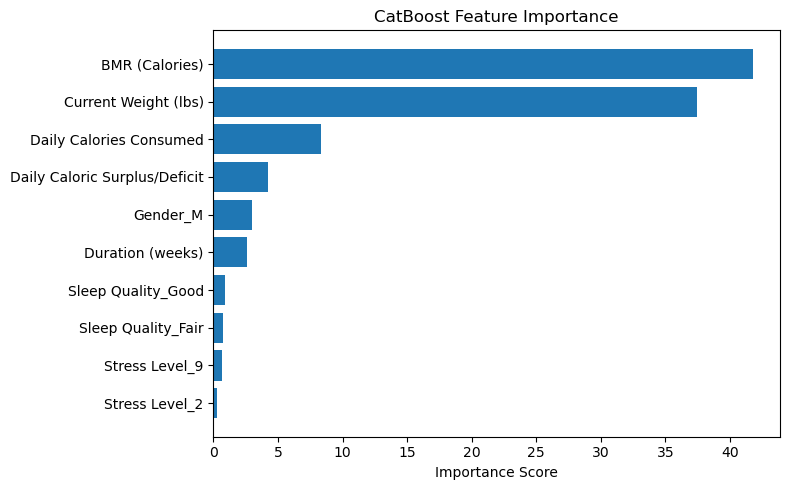

In [191]:
importances = best_model.get_feature_importance()
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n Feature Importance:")
print(feature_importance_df)

#Визуализация
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

*  На основе важности удалим следующие признаки и переучим модель:
1. Stress Level_2
2. Stress Level_9
3. Sleep Quality_Fair

In [192]:
#Новый набор признаков
X_reduced = new_encoded[[
    'Current Weight (lbs)',
    'Daily Calories Consumed',
    'BMR (Calories)',
    'Duration (weeks)',
    'Daily Caloric Surplus/Deficit',
    'Sleep Quality_Good',
    'Gender_M'
]]
y = new_encoded['Final Weight (lbs)']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=0
)

#Функция для оптимизации CatBoost по RMSE
def objective_reduced(trial):
    params = {
        'iterations': 500,
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 0
    }

    model = CatBoostRegressor(**params)
    model.fit(Xr_train, yr_train, eval_set=(Xr_test, yr_test), early_stopping_rounds=30, verbose=0)
    preds = model.predict(Xr_test)
    mse = metrics.mean_squared_error(yr_test, preds)
    return np.sqrt(mse)

#Запускаем Optuna
study_reduced = optuna.create_study(direction='minimize')
study_reduced.optimize(objective_reduced, n_trials=50)

[I 2025-03-24 22:46:20,137] A new study created in memory with name: no-name-b32081ec-50c8-499e-842a-20d9ad43101d
[I 2025-03-24 22:46:20,203] Trial 0 finished with value: 11.074250852376341 and parameters: {'depth': 3, 'learning_rate': 0.13779497321499118, 'l2_leaf_reg': 0.12581450867072239, 'random_strength': 0.03955474643016044, 'bagging_temperature': 0.7682761272617668, 'border_count': 138}. Best is trial 0 with value: 11.074250852376341.
[I 2025-03-24 22:46:20,375] Trial 1 finished with value: 11.036741790826643 and parameters: {'depth': 8, 'learning_rate': 0.09157995948203394, 'l2_leaf_reg': 2.970322250240129, 'random_strength': 0.02307268723916112, 'bagging_temperature': 0.8412164869511747, 'border_count': 188}. Best is trial 1 with value: 11.036741790826643.
[I 2025-03-24 22:46:20,651] Trial 2 finished with value: 16.670041040931704 and parameters: {'depth': 3, 'learning_rate': 0.0016981000608684439, 'l2_leaf_reg': 0.0023747745504903253, 'random_strength': 7.919051317915226, 'ba

*  Обучим новую модель и сравним ее с предыдущей:

In [193]:
best_params_reduced = study_reduced.best_params
best_model_reduced = CatBoostRegressor(**best_params_reduced, iterations=500, verbose=0, random_state=0)
best_model_reduced.fit(Xr_train, yr_train)
reduced_preds = best_model_reduced.predict(Xr_test)

#Метрики
cat_metrics_reduced = {
    'Model': 'CatBoost (Reduced)',
    'MAPE': metrics.mean_absolute_percentage_error(yr_test, reduced_preds),
    'RMSE': np.sqrt(metrics.mean_squared_error(yr_test, reduced_preds)),
    'R2': metrics.r2_score(yr_test, reduced_preds)
}

#Метрики модели (из предыдущего запуска)
cat_metrics_full = {
    'Model': 'CatBoost (Full)',
    'MAPE': metrics.mean_absolute_percentage_error(y3_test, cat_preds),
    'RMSE': np.sqrt(metrics.mean_squared_error(y3_test, cat_preds)),
    'R2': metrics.r2_score(y3_test, cat_preds)
}

metrics_compare_df = pd.DataFrame([cat_metrics_full, cat_metrics_reduced])
print("\n Сравнение метрик CatBoost до/после отбора признаков:")
print(metrics_compare_df)



 Сравнение метрик CatBoost до/после отбора признаков:
                Model      MAPE       RMSE        R2
0     CatBoost (Full)  0.043116   9.269349  0.851144
1  CatBoost (Reduced)  0.042835  10.119524  0.822585


*  Первая модель предсказывает точнее, для дальнейшего сравнения будем использовать ее

**Сравним метрики лассо регресии и Catboost:**

In [194]:
# Метрики CatBoost
cat_metrics = {
    'Model': 'CatBoost (Optuna tuned)',
    'MAPE': metrics.mean_absolute_percentage_error(y3_test, cat_preds),
    'RMSE': np.sqrt(metrics.mean_squared_error(y3_test, cat_preds)),
    'R2': metrics.r2_score(y3_test, cat_preds)
}

# Объединяем в DataFrame
metrics_df = pd.DataFrame([metrics_lasso, cat_metrics])
print(metrics_df)

                     Model     Alpha      MAPE       RMSE        R2
0         Lasso Regression  9.889923  0.043459  10.768487  0.799101
1  CatBoost (Optuna tuned)       NaN  0.043116   9.269349  0.851144


* В сравнении с лассо регрессией, Catboost показал себя лучше --> Далее будем применять Catboost

**Пол является разделяющим признаком. Попробуем построить модели отдельно, чтобы повысить точность:**

**1) Мужчины**

In [195]:
data_male = new_encoded[new_encoded['Gender_M'] == True].copy()
data_male = data_male.drop(['Gender_M'], axis = 1)

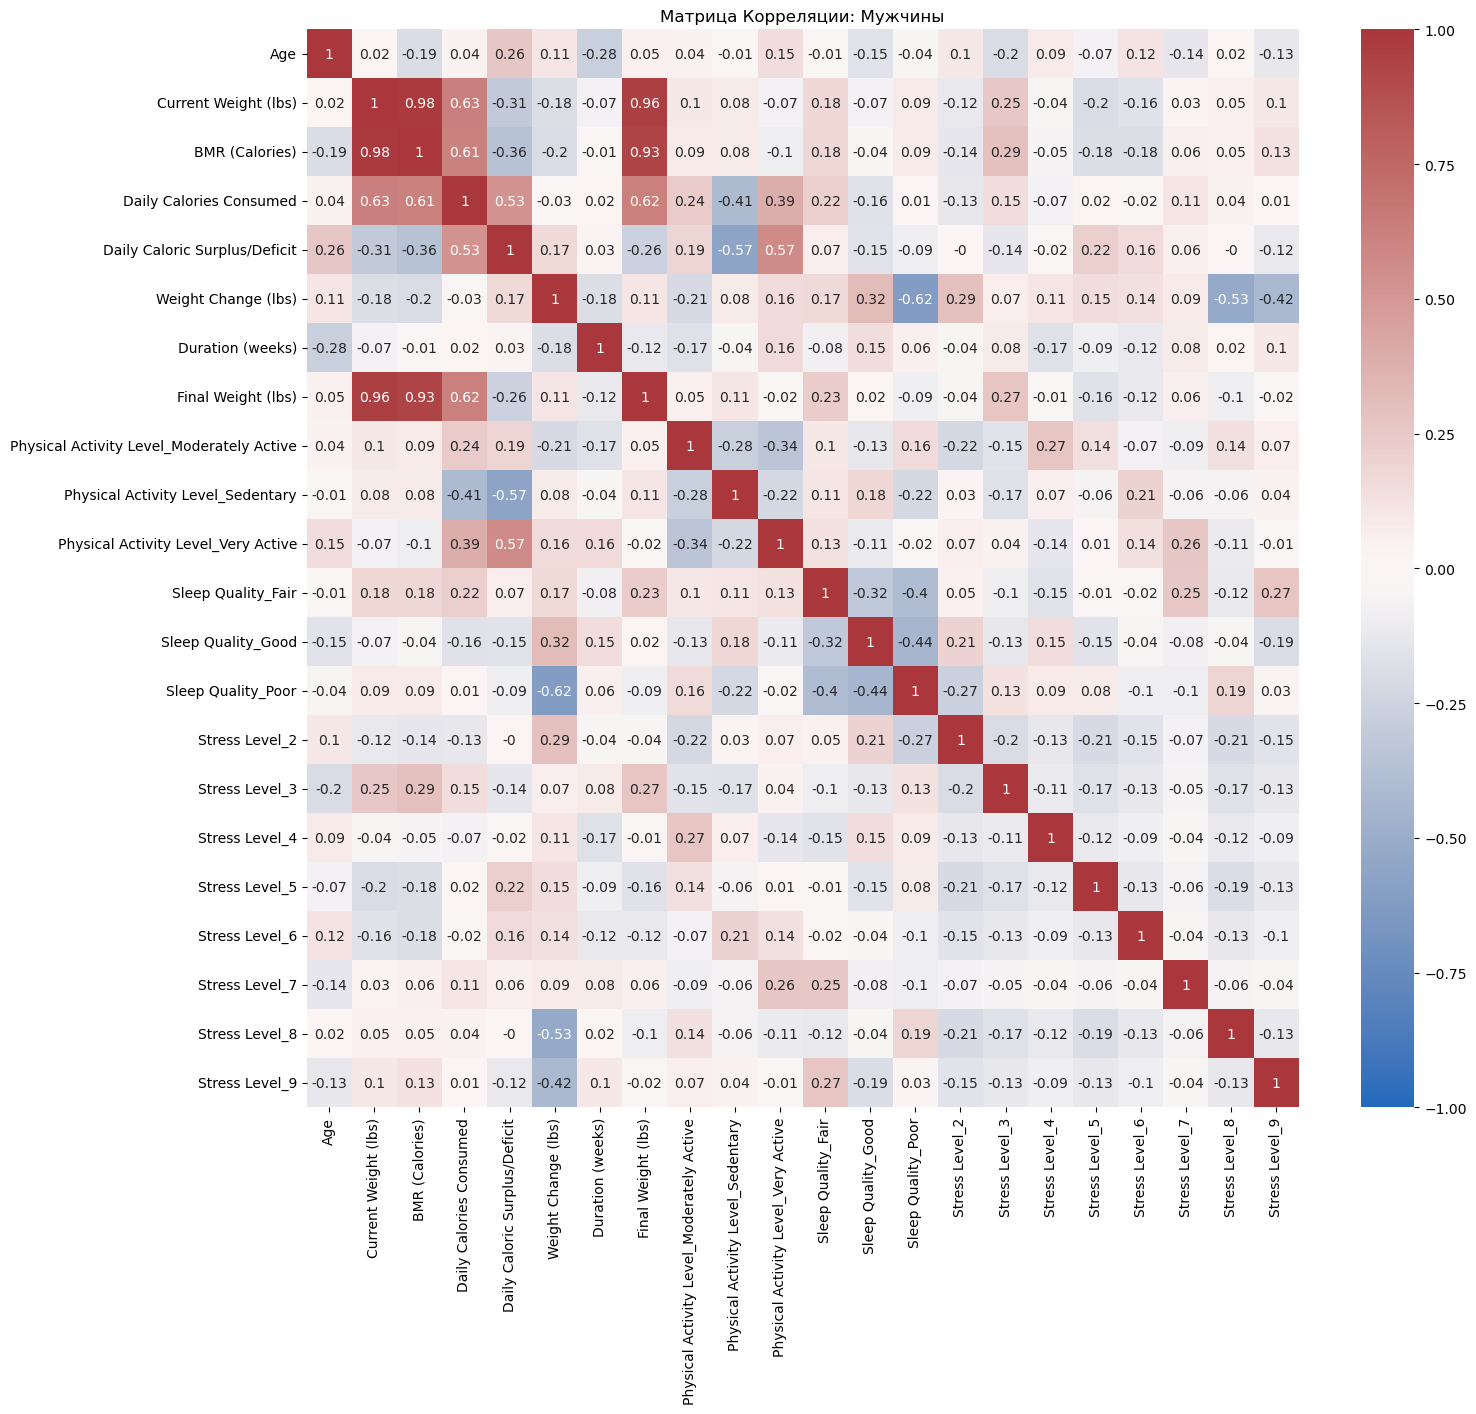

In [196]:
corr_male = data_male.corr().round(2)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_male, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Матрица Корреляции: Мужчины')
plt.show()

**Обучим модель и применим optuna:**

In [197]:
X1 = data_male[["Current Weight (lbs)",
                "Daily Calories Consumed", 
                'BMR (Calories)',
                'Daily Caloric Surplus/Deficit',
                'Duration (weeks)',
                'Sleep Quality_Fair',
                'Sleep Quality_Good',
                'Stress Level_2',
                'Stress Level_9']]

y1 = data_male["Final Weight (lbs)"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=0
)


#Функция для оптимизации CatBoost по RMSE
def objective_male(trial):
    params = {
        'iterations': 500,
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 0
    }

    model = CatBoostRegressor(**params)
    model.fit(X1_train, y1_train, eval_set=(X1_test, y1_test), early_stopping_rounds=30, verbose=0)

    preds = model.predict(X1_test)
    mse = metrics.mean_squared_error(y1_test, preds)
    return np.sqrt(mse)

#Запускаем Optuna
study_male = optuna.create_study(direction='minimize')
study_male.optimize(objective_male, n_trials=50)

best_params_male = study_male.best_params
best_model_male = CatBoostRegressor(**best_params_male, iterations=500, verbose=0, random_state=0)
best_model_male.fit(X1_train, y1_train)

#Предсказания
male_preds = best_model_male.predict(X1_test)

metrics_male = {
    'Model': 'CatBoost (data_male)',
    'MAPE': metrics.mean_absolute_percentage_error(y1_test, male_preds),
    'RMSE': np.sqrt(metrics.mean_squared_error(y1_test, male_preds)),
    'R2': metrics.r2_score(y1_test, male_preds)
}


[I 2025-03-24 22:46:45,796] A new study created in memory with name: no-name-83c0086b-7909-4967-8d98-aa587af9b01c
[I 2025-03-24 22:46:45,905] Trial 0 finished with value: 21.55738467781591 and parameters: {'depth': 7, 'learning_rate': 0.20663203842672984, 'l2_leaf_reg': 0.391465744033367, 'random_strength': 0.001420360955021897, 'bagging_temperature': 0.36432991688677163, 'border_count': 213}. Best is trial 0 with value: 21.55738467781591.
[I 2025-03-24 22:46:46,312] Trial 1 finished with value: 30.60698491408466 and parameters: {'depth': 8, 'learning_rate': 0.0012639291542334832, 'l2_leaf_reg': 0.12510611472203184, 'random_strength': 0.0012958655076965374, 'bagging_temperature': 0.8673161207206592, 'border_count': 66}. Best is trial 0 with value: 21.55738467781591.
[I 2025-03-24 22:46:46,423] Trial 2 finished with value: 21.703898448026585 and parameters: {'depth': 8, 'learning_rate': 0.10921391302895395, 'l2_leaf_reg': 0.045900459997412414, 'random_strength': 7.456221705875699, 'bagg

*  Посмотрим вклад предикторов в предсказание модели:


Feature Importance (Male Data):
                         Feature  Importance
0           Current Weight (lbs)   69.068352
2                 BMR (Calories)   23.745849
3  Daily Caloric Surplus/Deficit    1.979463
8                 Stress Level_9    1.941114
4               Duration (weeks)    1.822944
1        Daily Calories Consumed    0.511114
6             Sleep Quality_Good    0.378597
7                 Stress Level_2    0.288984
5             Sleep Quality_Fair    0.263583


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

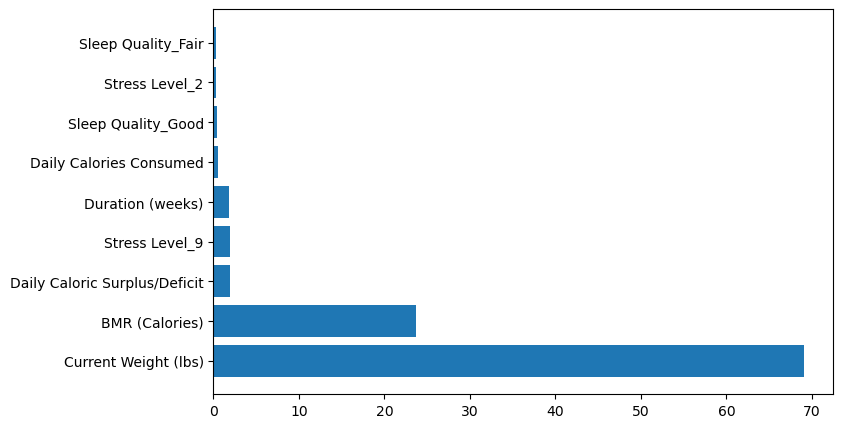

In [198]:
#Feature Importance
importances_male = best_model_male.get_feature_importance()
features_male = X1.columns

feature_importance_df_male = pd.DataFrame({
    'Feature': features_male,
    'Importance': importances_male
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Male Data):")
print(feature_importance_df_male)

#Визуализация
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df_male['Feature'], feature_importance_df_male['Importance'])
plt.xlabel

*  На основе важности удалим следующие признаки и переучим модель:
1. Stress Level_2
2. Daily Calories Consumed
3. Sleep Quality_Fair
4. Sleep Quality_Good

In [199]:
# Новый набор признаков
X1_reduced = data_male[[
    'Current Weight (lbs)',
    'BMR (Calories)',
    'Daily Caloric Surplus/Deficit',
    'Duration (weeks)',
    'Stress Level_9'
]]
y1_reduced = data_male["Final Weight (lbs)"]

X1r_train, X1r_test, y1r_train, y1r_test = train_test_split(
    X1_reduced, y1_reduced, test_size=0.2, random_state=0
)

#Функция для оптимизации CatBoost по RMSE
def objective_male_reduced(trial):
    params = {
        'iterations': 500,
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 0
    }

    model = CatBoostRegressor(**params)
    model.fit(X1r_train, y1r_train, eval_set=(X1r_test, y1r_test), early_stopping_rounds=30, verbose=0)
    preds = model.predict(X1r_test)
    rmse = np.sqrt(metrics.mean_squared_error(y1r_test, preds))
    return rmse

#Запускаем Optuna
study_male_reduced = optuna.create_study(direction='minimize')
study_male_reduced.optimize(objective_male_reduced, n_trials=50)


[I 2025-03-24 22:46:57,463] A new study created in memory with name: no-name-948c3a0e-c619-4394-a8f5-314db16e9abe
[I 2025-03-24 22:46:57,566] Trial 0 finished with value: 16.266621834343667 and parameters: {'depth': 4, 'learning_rate': 0.06215445120358062, 'l2_leaf_reg': 0.09089507031621165, 'random_strength': 0.016504239135717927, 'bagging_temperature': 0.39254331938041975, 'border_count': 174}. Best is trial 0 with value: 16.266621834343667.
[I 2025-03-24 22:46:57,774] Trial 1 finished with value: 21.99386780458076 and parameters: {'depth': 9, 'learning_rate': 0.09393782420946407, 'l2_leaf_reg': 1.131988350370945, 'random_strength': 0.026953762153388496, 'bagging_temperature': 0.5859537567283014, 'border_count': 122}. Best is trial 0 with value: 16.266621834343667.
[I 2025-03-24 22:46:57,892] Trial 2 finished with value: 15.240471739970802 and parameters: {'depth': 3, 'learning_rate': 0.056704896024568636, 'l2_leaf_reg': 1.7498142572036566, 'random_strength': 0.002695273921032977, 'b

*  Обучим новую модель и сравним ее с предыдущей:

In [200]:
best_params_male_reduced = study_male_reduced.best_params
best_model_male_reduced = CatBoostRegressor(**best_params_male_reduced, iterations=500, verbose=0, random_state=0)
best_model_male_reduced.fit(X1r_train, y1r_train)
male_preds_reduced = best_model_male_reduced.predict(X1r_test)

#Метрики
metrics_male_reduced = {
    'Model': 'CatBoost (data_male, reduced)',
    'MAPE': metrics.mean_absolute_percentage_error(y1r_test, male_preds_reduced),
    'RMSE': np.sqrt(metrics.mean_squared_error(y1r_test, male_preds_reduced)),
    'R2': metrics.r2_score(y1r_test, male_preds_reduced)
}

comparison_df = pd.DataFrame([metrics_male, metrics_male_reduced])
print("\nСравнение полной и сокращённой модели:")
print(comparison_df)


Сравнение полной и сокращённой модели:
                           Model      MAPE       RMSE        R2
0           CatBoost (data_male)  0.086069  15.510210  0.748111
1  CatBoost (data_male, reduced)  0.087109  15.559641  0.746503


*  Новая модель предсказывает точнее

**2) Женщины**

In [201]:
data_female = new_encoded[new_encoded['Gender_M'] == False].copy()
data_female = data_female.drop(['Gender_M'], axis = 1)

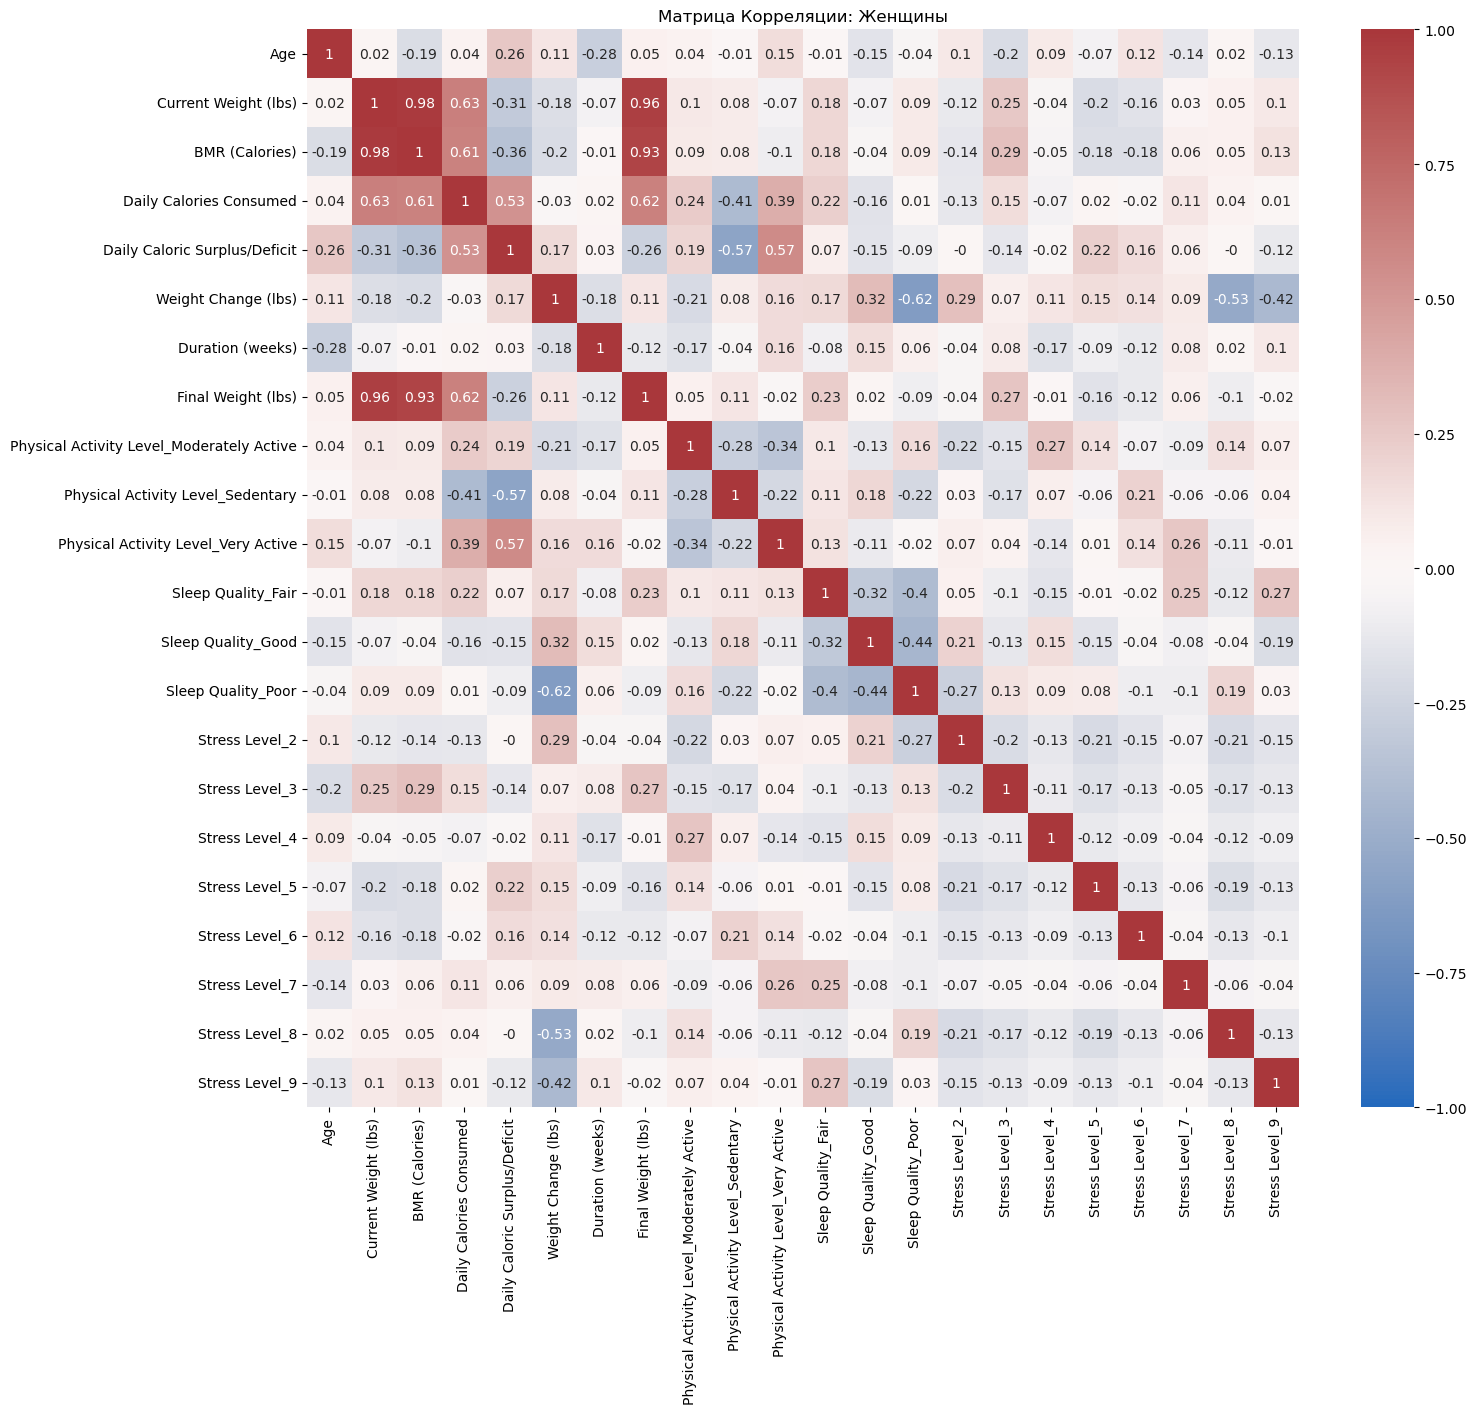

In [202]:
corr_female = data_female.corr().round(2)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_male, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Матрица Корреляции: Женщины')
plt.show()

**Обучим модель и применим optuna:**

In [203]:
X2 = data_female[["Current Weight (lbs)",
                "Daily Calories Consumed", 
                'BMR (Calories)',
                'Daily Caloric Surplus/Deficit',
                'Duration (weeks)',
                'Sleep Quality_Fair',
                'Sleep Quality_Good',
                'Stress Level_2',
                'Stress Level_9']]

y2 = data_female["Final Weight (lbs)"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=0
)

#Функция для оптимизации CatBoost по RMSE
def objective_female(trial):
    params = {
        'iterations': 500,
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 0
    }

    model = CatBoostRegressor(**params)
    model.fit(X2_train, y2_train, eval_set=(X2_test, y2_test), early_stopping_rounds=30, verbose=0)

    preds = model.predict(X2_test)
    rmse = np.sqrt(metrics.mean_squared_error(y2_test, preds))
    return rmse

#Запускаем Optuna
study_female = optuna.create_study(direction='minimize')
study_female.optimize(objective_female, n_trials=50)

best_params_female = study_female.best_params
best_model_female = CatBoostRegressor(**best_params_female, iterations=500, verbose=0, random_state=0)
best_model_female.fit(X2_train, y2_train)

#Предсказания
female_preds = best_model_female.predict(X2_test)

metrics_female = {
    'Model': 'CatBoost (data_female)',
    'MAPE': metrics.mean_absolute_percentage_error(y2_test, female_preds),
    'RMSE': np.sqrt(metrics.mean_squared_error(y2_test, female_preds)),
    'R2': metrics.r2_score(y2_test, female_preds)
}

[I 2025-03-24 22:47:06,643] A new study created in memory with name: no-name-9868c9c1-b99f-43e6-a532-4a9121617b54
[I 2025-03-24 22:47:06,767] Trial 0 finished with value: 16.55644158466073 and parameters: {'depth': 9, 'learning_rate': 0.14630844869849885, 'l2_leaf_reg': 0.0015190803715166648, 'random_strength': 3.1301390318063733, 'bagging_temperature': 0.3962166076846353, 'border_count': 184}. Best is trial 0 with value: 16.55644158466073.
[I 2025-03-24 22:47:06,907] Trial 1 finished with value: 7.720847484796234 and parameters: {'depth': 3, 'learning_rate': 0.0325334540714909, 'l2_leaf_reg': 0.4418029110010328, 'random_strength': 0.0049780194658233514, 'bagging_temperature': 0.6482288192969793, 'border_count': 111}. Best is trial 1 with value: 7.720847484796234.
[I 2025-03-24 22:47:07,553] Trial 2 finished with value: 17.023502195393743 and parameters: {'depth': 8, 'learning_rate': 0.0025648048775206815, 'l2_leaf_reg': 0.01138604611000004, 'random_strength': 0.22820063405814608, 'bag

*  Посмотрим вклад предикторов в предсказание модели:


Feature Importance (Female Data):
                         Feature  Importance
0           Current Weight (lbs)   62.590445
2                 BMR (Calories)   34.047704
3  Daily Caloric Surplus/Deficit    1.570879
1        Daily Calories Consumed    1.357700
4               Duration (weeks)    0.284956
5             Sleep Quality_Fair    0.068036
6             Sleep Quality_Good    0.043890
7                 Stress Level_2    0.036391
8                 Stress Level_9    0.000000


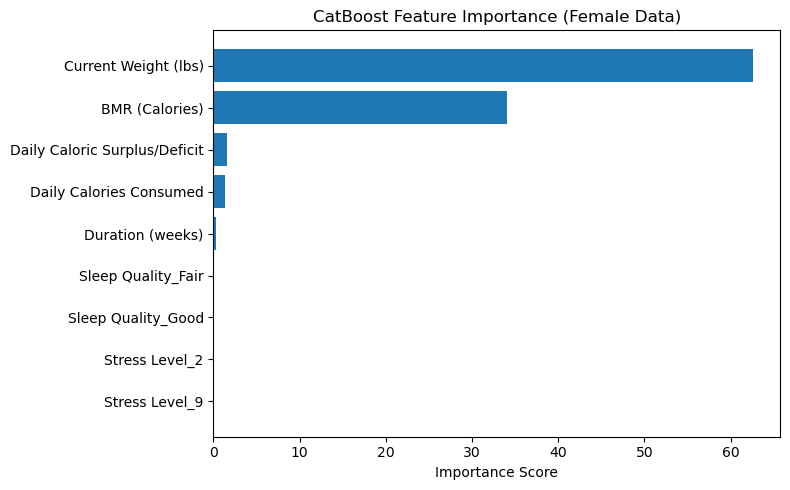

In [204]:
#Feature Importance
importances_female = best_model_female.get_feature_importance()
features_female = X2.columns

feature_importance_df_female = pd.DataFrame({
    'Feature': features_female,
    'Importance': importances_female
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Female Data):")
print(feature_importance_df_female)

#Визуализация
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df_female['Feature'], feature_importance_df_female['Importance'])
plt.xlabel('Importance Score')
plt.title('CatBoost Feature Importance (Female Data)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

*  На основе важности удалим следующие признаки и переучим модель:
1. Stress Level_2
2. Stress Level_9
3. Sleep Quality_Fair
4. Sleep Quality_Good
5. Duration (weeks)


In [205]:
#Новый набор признаков
X2_reduced = data_female[[
    'Current Weight (lbs)',
    'BMR (Calories)',
    'Daily Calories Consumed',
    'Daily Caloric Surplus/Deficit'
]]
y2_reduced = data_female["Final Weight (lbs)"]

X2r_train, X2r_test, y2r_train, y2r_test = train_test_split(
    X2_reduced, y2_reduced, test_size=0.2, random_state=0
)

#Функция для оптимизации CatBoost по RMSE
def objective_female_reduced(trial):
    params = {
        'iterations': 500,
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 0
    }

    model = CatBoostRegressor(**params)
    model.fit(X2r_train, y2r_train, eval_set=(X2r_test, y2r_test), early_stopping_rounds=30, verbose=0)
    preds = model.predict(X2r_test)
    return np.sqrt(metrics.mean_squared_error(y2r_test, preds))

#Запускаем Optuna
study_female_reduced = optuna.create_study(direction='minimize')
study_female_reduced.optimize(objective_female_reduced, n_trials=50)

[I 2025-03-24 22:47:18,293] A new study created in memory with name: no-name-cde5fe71-4f0e-41c1-bc2a-89c6f4079be2
[I 2025-03-24 22:47:18,520] Trial 0 finished with value: 8.602539933198662 and parameters: {'depth': 9, 'learning_rate': 0.10874464325869566, 'l2_leaf_reg': 1.9145324468090545, 'random_strength': 6.958286975973879, 'bagging_temperature': 0.5330444602523755, 'border_count': 81}. Best is trial 0 with value: 8.602539933198662.
[I 2025-03-24 22:47:18,638] Trial 1 finished with value: 8.967731669138619 and parameters: {'depth': 8, 'learning_rate': 0.06857488547815455, 'l2_leaf_reg': 0.5804360039818616, 'random_strength': 1.39356702489005, 'bagging_temperature': 0.8861378442536351, 'border_count': 140}. Best is trial 0 with value: 8.602539933198662.
[I 2025-03-24 22:47:18,822] Trial 2 finished with value: 7.024579590322687 and parameters: {'depth': 5, 'learning_rate': 0.011934901187757896, 'l2_leaf_reg': 0.006518224591030942, 'random_strength': 0.12753271114589398, 'bagging_tempe

*  Обучим новую модель и сравним ее с предыдущей:

In [206]:
best_params_female_reduced = study_female_reduced.best_params
best_model_female_reduced = CatBoostRegressor(**best_params_female_reduced, iterations=500, verbose=0, random_state=0)
best_model_female_reduced.fit(X2r_train, y2r_train)
female_preds_reduced = best_model_female_reduced.predict(X2r_test)

#Метрики
metrics_female_reduced = {
    'Model': 'CatBoost (female, reduced)',
    'MAPE': metrics.mean_absolute_percentage_error(y2r_test, female_preds_reduced),
    'RMSE': np.sqrt(metrics.mean_squared_error(y2r_test, female_preds_reduced)),
    'R2': metrics.r2_score(y2r_test, female_preds_reduced)
}


*  Первая модель предсказывает точнее

**Сравним метрики трех моделей (с разделением по полу и без)**

In [207]:
final_comparison = pd.DataFrame([cat_metrics, metrics_male_reduced, metrics_female])
print(final_comparison)

                           Model      MAPE       RMSE        R2
0        CatBoost (Optuna tuned)  0.043116   9.269349  0.851144
1  CatBoost (data_male, reduced)  0.087109  15.559641  0.746503
2         CatBoost (data_female)  0.039702   6.757055  0.944017


**Выводы:**
1. `Модель CatBoost (data_female)` - лучший выбор для предсказания веса, если участник - Женщина:
У модели `самое низкое RMSE и высочайший R²`, что говорит о высокой точности и надёжности
2. `CatBoost (Optuna tuned)` - оптимальный выбор, если пол участника неизвестен или модель должна работать `универсально`



* Судя по всем результатам, предкторы Current Weight (lbs) и Daily Calories Consumed могут быть настолько важными для предсказания целевой переменной (итогового веса), что регуляризация не изменяет их влияние на модель, несмотря на сильную корреляцию

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

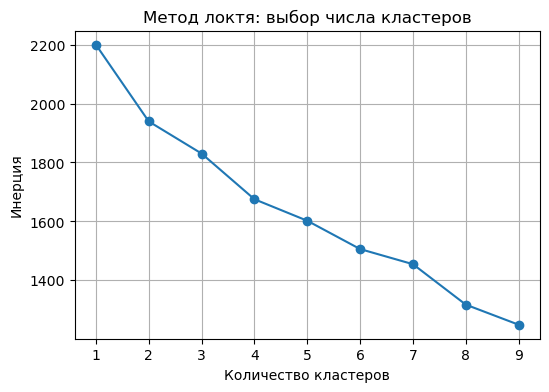

In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

#Выбираем признаки (убираем Final Weight (lbs), Weight Change (lbs))
# X_clust = new_encoded.drop(columns=['Final Weight (lbs)', 'Weight Change (lbs)'], errors='ignore')
X_clust = new_encoded.drop(columns=['Weight Change (lbs)'], errors='ignore')

#Масштабируем
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

#Применяем метод локтя для определения оптимального числа кластеров
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.title('Метод локтя: выбор числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


*  На графике заметен явный излом между k=3 и k=4
*  После 3 кластеров прирост качества не настолько велик, чтобы увеличивать сложность
*  Выбираем n_clusters=3

**Проведем кластерный анализ:**

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


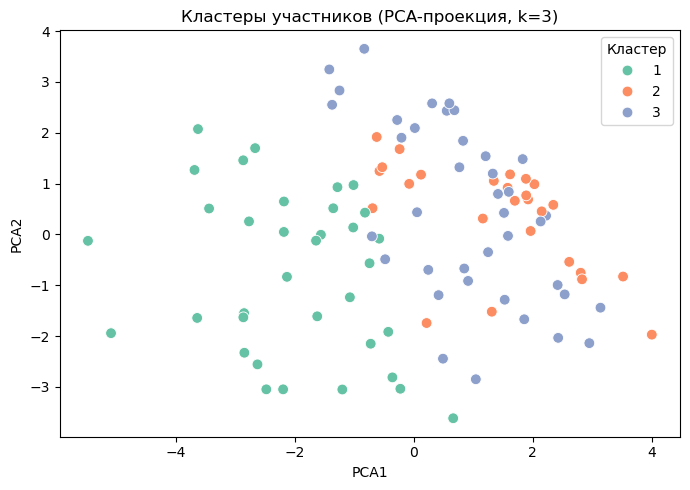

In [209]:
kmeans = KMeans(n_clusters=3, random_state=0)
new_encoded['Cluster'] = kmeans.fit_predict(X_scaled) + 1

#PCA для визуализации
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
new_encoded['PCA1'] = pca_result[:, 0]
new_encoded['PCA2'] = pca_result[:, 1]

#Визуализируем кластеры
plt.figure(figsize=(7, 5))
sns.scatterplot(data=new_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Кластеры участников (PCA-проекция, k=3)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Кластер')
plt.tight_layout()
plt.show()

* Участники сгруппировались в 3 кластера, отражающих различия в весе, возрасте и количестве потребляемых калорий

**Выведем количество участников в каждом кластере:**

In [210]:
print("\nРаспределение по кластерам:")
print(new_encoded['Cluster'].value_counts())


Распределение по кластерам:
Cluster
3    39
1    35
2    26
Name: count, dtype: int64


**Построим график распределния веса по кластерам:**

C:\Users\Admin\AppData\Local\Temp\ipykernel_33088\2593487327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_encoded, x='Cluster', y='Weight Change (lbs)', palette='Set2')


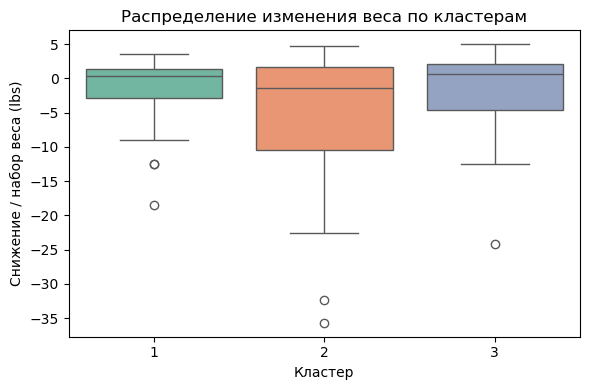

In [211]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=new_encoded, x='Cluster', y='Weight Change (lbs)', palette='Set2')
plt.title('Распределение изменения веса по кластерам')
plt.ylabel('Снижение / набор веса (lbs)')
plt.xlabel('Кластер')
plt.tight_layout()
plt.show()

**Охарактеризуем каждый из кластеров:**

1. Кластер 1 - `Снижение веса`:
*  Медианное изменение веса: ~-0.391 lbs
*  Широкий разброс значений, включая сильное снижение веса (до –35 lbs)
*  Большое число отрицательных значений --> Много участников сбросили вес

2. Кластер 2 - `Небольшой набор веса`:
*  Медианное изменение веса: +0.4 lbs
*  Диапазон значений широкий, сдвинут в положительную сторону
*  Присутствуют участники с сильной потерей веса (~25 lbs), но медиана ближе к 0

3. Кластер 3 - `Поддержание веса`:
*  Медианное изменение веса: 0
*  Распределение узкое, участники в основном не теряли и не набирали вес

**Выясним, какие поведенческие и физиологичские особенности связаны с результатами по весу:**

*  Рассмотрим медианные значения количественных переменных:

In [212]:
# Выберем нужные признаки
features_to_analyze = [
    'Current Weight (lbs)',
    'Daily Caloric Surplus/Deficit',
    'Duration (weeks)',
]

# Группируем по кластерам и считаем медианные значения
cluster_behavior = new_encoded.groupby('Cluster')[features_to_analyze].median()

# Отображаем
pd.set_option('display.max_columns', None)
display(cluster_behavior)


,Current Weight (lbs),Daily Caloric Surplus/Deficit,Duration (weeks)
Cluster,,,
1,152.90,747.8,8.0
2,185.35,1143.1,6.0
3,181.90,1160.9,7.0


*  Рассмотрим средние значения категориальных переменных:

In [213]:
# Выберем нужные признаки
features_to_analyze = [
    'Gender_M',
    'Physical Activity Level_Moderately Active',
    'Physical Activity Level_Sedentary',
    'Physical Activity Level_Very Active',
    'Sleep Quality_Good',
    'Sleep Quality_Fair',
    'Sleep Quality_Poor',
    'Stress Level_2',
    'Stress Level_3',
    'Stress Level_4',
    'Stress Level_5',
    'Stress Level_6',
    'Stress Level_7',
    'Stress Level_8',
    'Stress Level_9',
]

# Группируем по кластерам и считаем средние значения
cluster_behavior = new_encoded.groupby('Cluster')[features_to_analyze].mean()

# Отображаем
pd.set_option('display.max_columns', None)
display(cluster_behavior)


,Gender_M,Physical Activity Level_Moderately Active,Physical Activity Level_Sedentary,Physical Activity Level_Very Active,Sleep Quality_Good,Sleep Quality_Fair,Sleep Quality_Poor,Stress Level_2,Stress Level_3,Stress Level_4,Stress Level_5,Stress Level_6,Stress Level_7,Stress Level_8,Stress Level_9
Cluster,,,,,,,,,,,,,,,
1,0.228571,0.114286,0.428571,0.028571,0.228571,0.228571,0.371429,0.200000,0.171429,0.028571,0.114286,0.142857,0.200000,0.028571,0.057143
2,0.807692,0.807692,0.076923,0.038462,0.153846,0.423077,0.346154,0.038462,0.038462,0.153846,0.153846,0.038462,0.038462,0.230769,0.230769
3,0.717949,0.000000,0.102564,0.538462,0.256410,0.128205,0.410256,0.153846,0.179487,0.051282,0.076923,0.179487,0.051282,0.102564,0.025641


**Влияние признаков на изменение веса по каждому кластеру:**

In [ ]:
# Данные по Кластеру 1
df_cluster_1 = pd.DataFrame({
    "Признак": [
        "Current Weight (lbs)",
        "Daily Caloric Surplus/Deficit",
        "Duration (weeks)",
        "Gender_M",
        "Physical Activity",
        "Sleep Quality",
        "Stress Level"
    ],
    "Повлиял? [да/нет]": ["да", "да", "нет", "нет", "да", "нет", "нет"],
    "Пояснение": [
        "Самый высокий вес --> выше потенциал снижения",
        "Умеренный профицит позволил худеть",
        "Такая же длительность, как у кластера 2, но результат лучше",
        "Почти все мужчины, но результат средний",
        "Участники были частично активны",
        "Большая часть с плохим сном, но участники худели",
        "Стресс не мешал результату"
    ]
})

# Данные по Кластеру 2
df_cluster_2 = pd.DataFrame({
    "Признак": [
        "Current Weight (lbs)",
        "Daily Caloric Surplus/Deficit",
        "Duration (weeks)",
        "Gender_M",
        "Physical Activity",
        "Sleep Quality",
        "Stress Level"
    ],
    "Повлиял? [да/нет]": ["да", "да", "нет", "нет", "нет", "нет", "нет"],
    "Пояснение": [
        "Средний вес (но он не компенсировал переедания)",
        "Максимальный профицит --> набор веса",
        "Такая же, как у кластера 1, но результат хуже",
        "Пол сбалансирован, но результат — набор",
        "Несмотря на высокую активность, участники набирали вес",
        "Слабый сон, но не объясняет прирост веса напрямую",
        "Высокий стресс не был ключевым фактором"
    ]
})

# Данные по Кластеру 3
df_cluster_3 = pd.DataFrame({
    "Признак": [
        "Current Weight (lbs)",
        "Daily Caloric Surplus/Deficit",
        "Duration (weeks)",
        "Gender_M",
        "Physical Activity",
        "Sleep Quality",
        "Stress Level"
    ],
    "Повлиял? [да/нет]": ["да", "да", "да", "да", "нет", "нет", "нет"],
    "Пояснение": [
        "Самый низкий вес --> снижать дальше сложнее",
        "Самый низкий профицит --> удержание/снижение веса",
        "Самая длинная --> способствовала стабилизации",
        "Большинство — женщины --> стиль питания и цели могли отличаться",
        "Почти 40% сидячих, но результат стабильный",
        "Нет устойчивой связи",
        "Высокий стресс, но участники поддерживали вес"
    ]
})

pd.set_option('display.max_colwidth', None)     # Показываем полные строки в ячейках, все строки, все столбцы, а также не переносим таблицу на новую строку

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


print("Кластер 1:\n", df_cluster_1, "\n")
print("Кластер 2:\n", df_cluster_2, "\n")
print("Кластер 3:\n", df_cluster_3)


Кластер 1:
                          Признак Повлиял? [да/нет]                                                    Пояснение
0           Current Weight (lbs)                да                Самый высокий вес --> выше потенциал снижения
1  Daily Caloric Surplus/Deficit                да                           Умеренный профицит позволил худеть
2               Duration (weeks)               нет  Такая же длительность, как у кластера 2, но результат лучше
3                       Gender_M               нет                      Почти все мужчины, но результат средний
4              Physical Activity                да                              Участники были частично активны
5                  Sleep Quality               нет             Большая часть с плохим сном, но участники худели
6                   Stress Level               нет                                   Стресс не мешал результату 

Кластер 2:
                          Признак Повлиял? [да/нет]                            

**Рекомендации для каждого кластера на основе их характеристик и рестультаов снижения веса:**

1. Кластер 1 --> усилить снижение веса

*  Слегка уменьшить калорийность питания (умеренный дефицит вместо профицита)
*  Увеличить физическую активность — особенно кардио
*  `Необходимо контролировать питание`

2. Кластер 2 --> остановить набор веса и перейти к снижению

*  Существенно снизить потребление калорий — профицит слишком высок
*  Сохранить физическую активность, но сделать акцент на питание
*  `Необходимо перестроить рацион и прекратить переедание`

3. Кластер 3 --> удержание или мягкое снижение веса

*  Поддерживать существующий умеренный режим питания
*  `При желании ускорить результат необходимо перевести легкий профицит в небольшой дефицит`

**Основные факторы, повлиявшие на изменение веса:**

1. `Ежедневный профицит/дефицит калорий` --> ключевой фактор контроля веса
*  Участники с высоким профицитом (кластер 2) чаще набирали вес
*  Участники с умеренным или низким профицитом (кластеры 1 и 3) — снижали или стабилизировали вес

2. `Текущий вес` --> влияет на потенциал изменения веса
*  Участники с высоким начальным весом имели больше шансов на снижение
*  Участники с низким весом чаще демонстрировали стабильность

3. `Длительность эксперимента` --> влияет на устойчивость результата
*  чем дольше участие — тем лучше контроль над весом (особенно у женщин)

**Факторы, не оказавшие значимого влияния:**

1. `Уровень физической активности` --> активность не компенсирует переедание
*  Даже высокая активность (кластер 2) не привела к снижению веса при высоком профиците

2. `Пол` --> пол сам по себе не влияет, важны другие факторы
*  Пол не имел прямого влияния: мужчины и женщины были в разных кластерах, но результат зависел от других признаков

3. `Качество сна` --> не определяет результат, но может играть второстепенную роль
* Не выявлено устойчивой связи между сном и изменением веса

4. `Уровень стресса` --> качество сна стресс не был критическим ограничителем снижения веса
*  Высокий уровень стресса наблюдался в успешных и неуспешных кластерах

**Общий вывод:**
*  Изменение веса участников в первую очередь зависело от калорийного баланса, исходного веса и длительности участия.
Поведенческие и психологические факторы, такие как активность, сон и стресс, не показали устойчивого влияния, если не сопровождались адекватным контролем питания.